## Analysis of Jokic's stats for season 23/24

Last game from the stats was played on 2nd March, vs Lakers

In [6]:
import pandas as pd

In [7]:
jokic_data = pd.read_csv("Jokic_Season23_24_Stats.csv")

In [8]:
jokic_data.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,203999,22300869,"MAR 02, 2024",DEN @ LAL,W,39,16,25,0.640,...,8,10,7,0,1,3,1,35,16,1
1,22023,203999,22300855,"FEB 29, 2024",DEN vs. MIA,W,38,6,15,0.400,...,9,11,7,1,2,4,4,18,12,1
2,22023,203999,22300847,"FEB 28, 2024",DEN vs. SAC,W,32,5,9,0.556,...,13,14,11,3,1,2,3,14,37,1
3,22023,203999,22300824,"FEB 25, 2024",DEN @ GSW,W,37,13,24,0.542,...,14,16,16,4,1,2,3,32,20,1
4,22023,203999,22300812,"FEB 23, 2024",DEN @ POR,W,35,12,17,0.706,...,12,15,14,2,1,2,4,29,24,1


In [9]:
attributes_of_intereset = ["MATCHUP", "WL", "MIN", "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT",
                            "FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TOV",
                            "PF", "PTS", "PLUS_MINUS"]

In [10]:
attributes_stats = ["MIN", "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT",
                    "FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TOV",
                    "PF", "PTS", "PLUS_MINUS"]

In [12]:
data = jokic_data.loc[:, attributes_of_intereset]

In [13]:
data_stats = jokic_data.loc[:, attributes_stats]

In [14]:
data_stats.head()

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS
0,39,16,25,0.640,1,5,0.200,2,2,1.0,2,8,10,7,0,1,3,1,35,16
1,38,6,15,0.400,0,3,0.000,6,6,1.0,2,9,11,7,1,2,4,4,18,12
2,32,5,9,0.556,0,0,0.000,4,4,1.0,1,13,14,11,3,1,2,3,14,37
3,37,13,24,0.542,2,6,0.333,4,4,1.0,2,14,16,16,4,1,2,3,32,20
4,35,12,17,0.706,1,3,0.333,4,5,0.8,3,12,15,14,2,1,2,4,29,24


In [52]:
data_stats["FG2M"] = data_stats["FGM"] - data_stats["FG3M"]
data_stats["FG2A"] = data_stats["FGA"] - data_stats["FG3A"]

In [53]:
data_stats["FG2_PCT"] = data_stats["FG2M"] / data_stats["FG2A"]

In [54]:
fg2m = data_stats.pop("FG2M")
fg2a = data_stats.pop("FG2A")
fg2pct = data_stats.pop("FG2_PCT")

In [55]:
data_stats.insert(4, "FG2M", fg2m)
data_stats.insert(5, "FG2A", fg2a)
data_stats.insert(6, "FG2_PCT", fg2pct)

In [56]:
data_stats["FG2_PCT"] = data_stats["FG2_PCT"].map('{:.3f}'.format)

In [57]:
data_stats["FG2_PCT"] = pd.to_numeric(data_stats["FG2_PCT"], errors='coerce')

In [58]:
type(data_stats["FG2_PCT"][0])

numpy.float64

In [59]:
data_stats.head()

,MIN,FGM,FGA,FG_PCT,FG2M,FG2A,FG2_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS
0,39,16,25,0.640,15,20,0.750,1,5,0.200,...,2,8,10,7,0,1,3,1,35,16
1,38,6,15,0.400,6,12,0.500,0,3,0.000,...,2,9,11,7,1,2,4,4,18,12
2,32,5,9,0.556,5,9,0.556,0,0,0.000,...,1,13,14,11,3,1,2,3,14,37
3,37,13,24,0.542,11,18,0.611,2,6,0.333,...,2,14,16,16,4,1,2,3,32,20
4,35,12,17,0.706,11,14,0.786,1,3,0.333,...,3,12,15,14,2,1,2,4,29,24


In [61]:
column_averages = data_stats.mean().round(3)

In [62]:
column_averages

MIN           33.949
FGM           10.220
FGA           17.576
FG_PCT         0.604
FG2M           9.203
FG2A          14.593
FG2_PCT        0.648
FG3M           1.017
FG3A           2.983
FG3_PCT        0.350
FTM            4.492
FTA            5.475
FT_PCT         0.770
OREB           2.864
DREB           9.373
REB           12.237
AST            9.220
STL            1.220
BLK            0.932
TOV            2.915
PF             2.576
PTS           25.949
PLUS_MINUS     8.068
dtype: float64

In [63]:
data_avg = pd.DataFrame(column_averages)

In [64]:
data_avg

,0
MIN,33.949
FGM,10.220
FGA,17.576
FG_PCT,0.604
FG2M,9.203
FG2A,14.593
FG2_PCT,0.648
FG3M,1.017
FG3A,2.983
FG3_PCT,0.350


In [69]:
jokic_data["OPPONENT"] = jokic_data["MATCHUP"].apply(lambda x: x.split()[-1])

In [70]:
opponent = jokic_data.pop("OPPONENT")

In [71]:
jokic_data.insert(5, "OPPONENT", opponent)

In [72]:
jokic_data["HOME"] = jokic_data["MATCHUP"].apply(lambda x: 1 if 'vs.' in x else 0)

In [73]:
home = jokic_data.pop("HOME")

In [74]:
jokic_data.insert(4, "HOME", home)

In [76]:
jokic_data.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,HOME,MATCHUP,OPPONENT,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,203999,22300869,"MAR 02, 2024",0,DEN @ LAL,LAL,W,39,16,...,8,10,7,0,1,3,1,35,16,1
1,22023,203999,22300855,"FEB 29, 2024",1,DEN vs. MIA,MIA,W,38,6,...,9,11,7,1,2,4,4,18,12,1
2,22023,203999,22300847,"FEB 28, 2024",1,DEN vs. SAC,SAC,W,32,5,...,13,14,11,3,1,2,3,14,37,1
3,22023,203999,22300824,"FEB 25, 2024",0,DEN @ GSW,GSW,W,37,13,...,14,16,16,4,1,2,3,32,20,1
4,22023,203999,22300812,"FEB 23, 2024",0,DEN @ POR,POR,W,35,12,...,12,15,14,2,1,2,4,29,24,1


In [78]:
jokic_data["GAME_DATE"] = pd.to_datetime(jokic_data["GAME_DATE"])

C:\Users\alpesh\AppData\Local\Temp\ipykernel_6776\3432267636.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  jokic_data["GAME_DATE"] = pd.to_datetime(jokic_data["GAME_DATE"])


In [79]:
type(jokic_data["GAME_DATE"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
jokic_data.shape

(59, 29)

In [82]:
jokic_data.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'HOME', 'MATCHUP',
       'OPPONENT', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [83]:
%matplotlib inline

<Axes: title={'center': "Jokic's +/- through the games"}, xlabel='GAME_DATE', ylabel='PLUS_MINUS'>

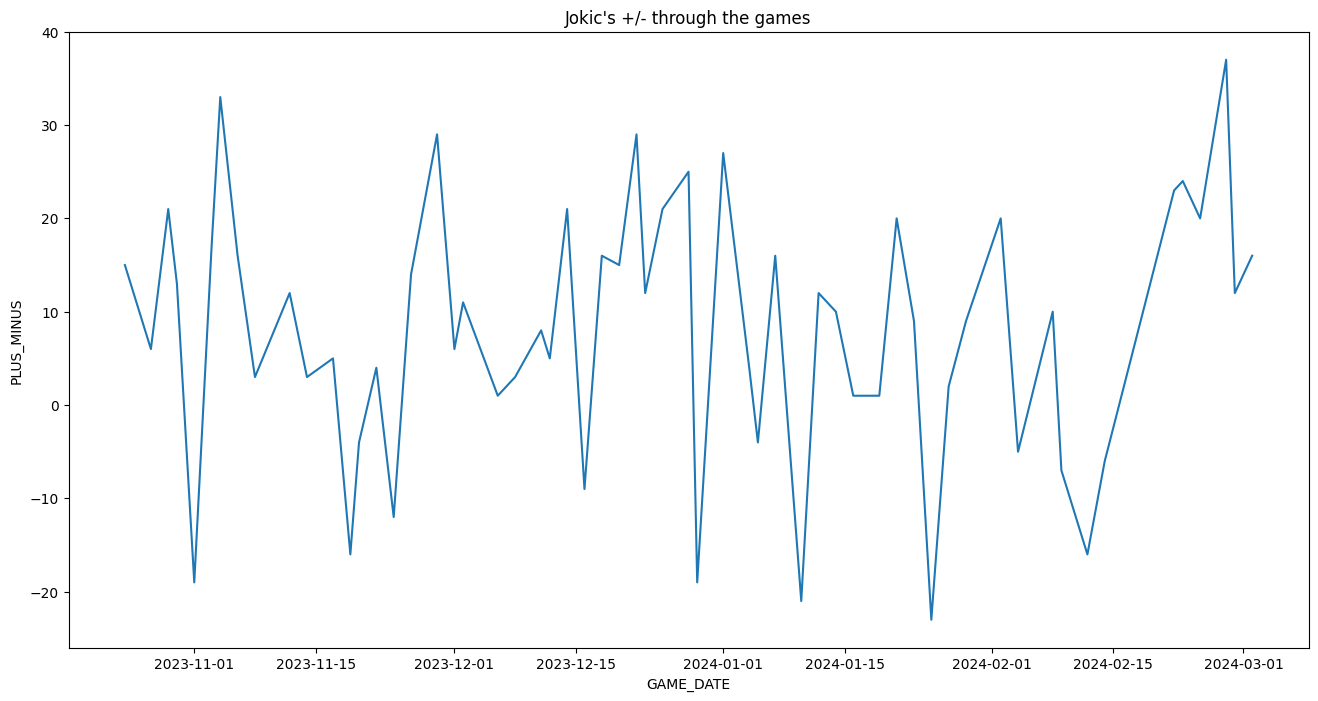

In [111]:
plt.figure(figsize=(16, 8))
plt.title("Jokic's +/- through the games")
sns.lineplot(data=jokic_data, x="GAME_DATE", y="PLUS_MINUS")

Text(0.5, 0, 'GAME_DATE')

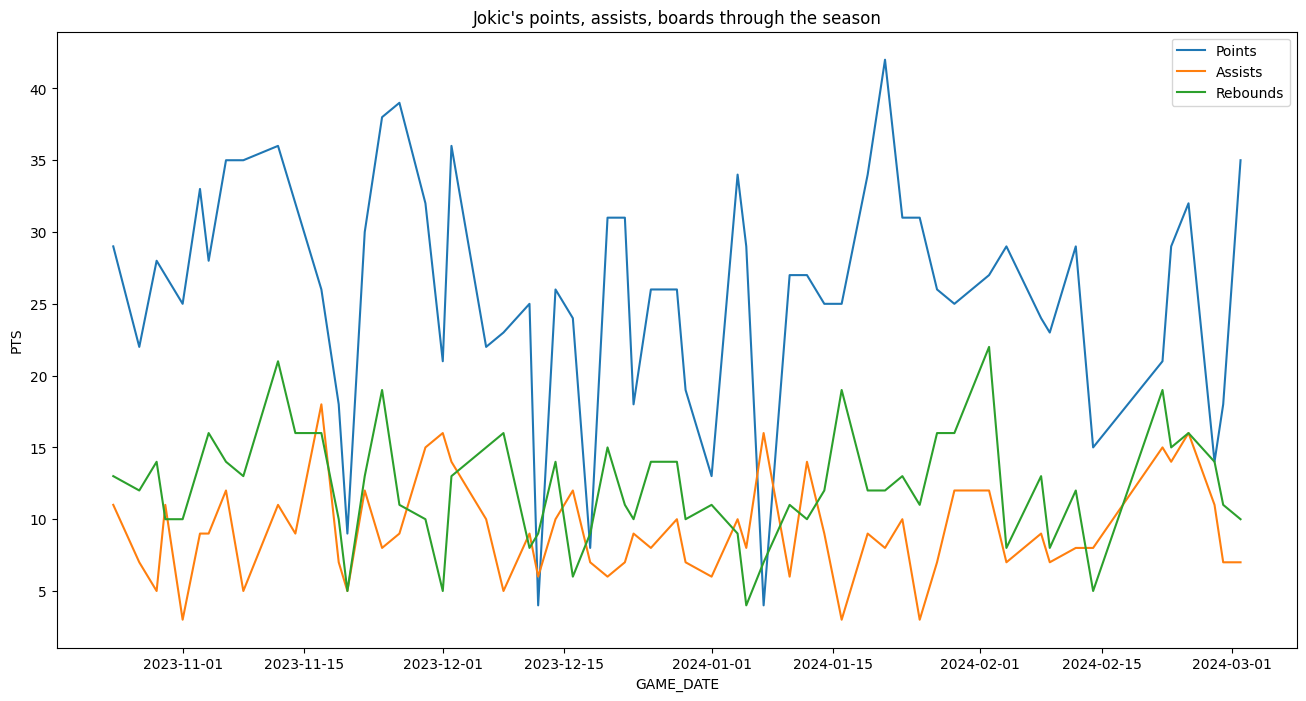

In [112]:
plt.figure(figsize=(16, 8))
plt.title("Jokic's points, assists, boards through the season")
sns.lineplot(data=jokic_data, x="GAME_DATE", y="PTS", label="Points")
sns.lineplot(data=jokic_data, x="GAME_DATE", y="AST", label="Assists")
sns.lineplot(data=jokic_data, x="GAME_DATE", y="REB", label="Rebounds")
plt.xlabel("GAME_DATE")

Text(0.5, 0, 'Opponents')

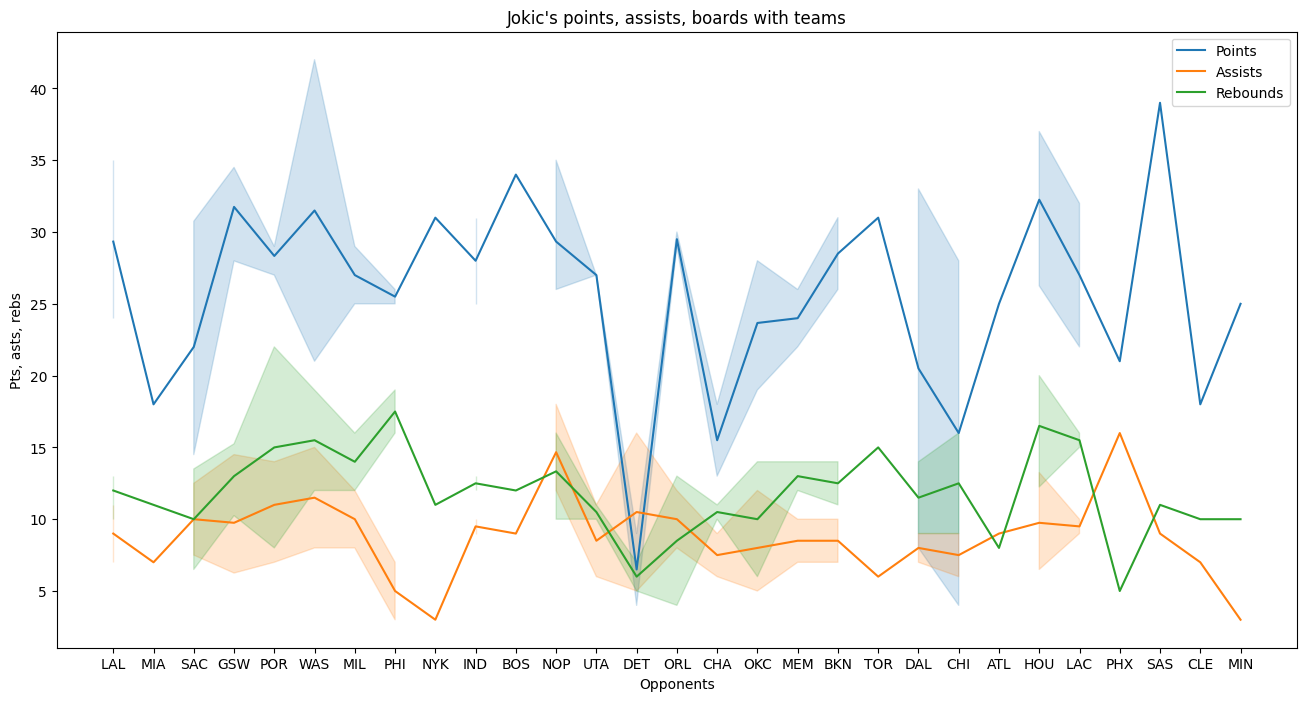

In [157]:
plt.figure(figsize=(16, 8))
plt.title("Jokic's points, assists, boards with teams")
sns.lineplot(data=jokic_data, x="OPPONENT", y="PTS", label="Points")
sns.lineplot(data=jokic_data, x="OPPONENT", y="AST", label="Assists")
sns.lineplot(data=jokic_data, x="OPPONENT", y="REB", label="Rebounds")
plt.ylabel("Pts, asts, rebs")
plt.xlabel("Opponents")

Text(0, 0.5, 'Field goal percentage')

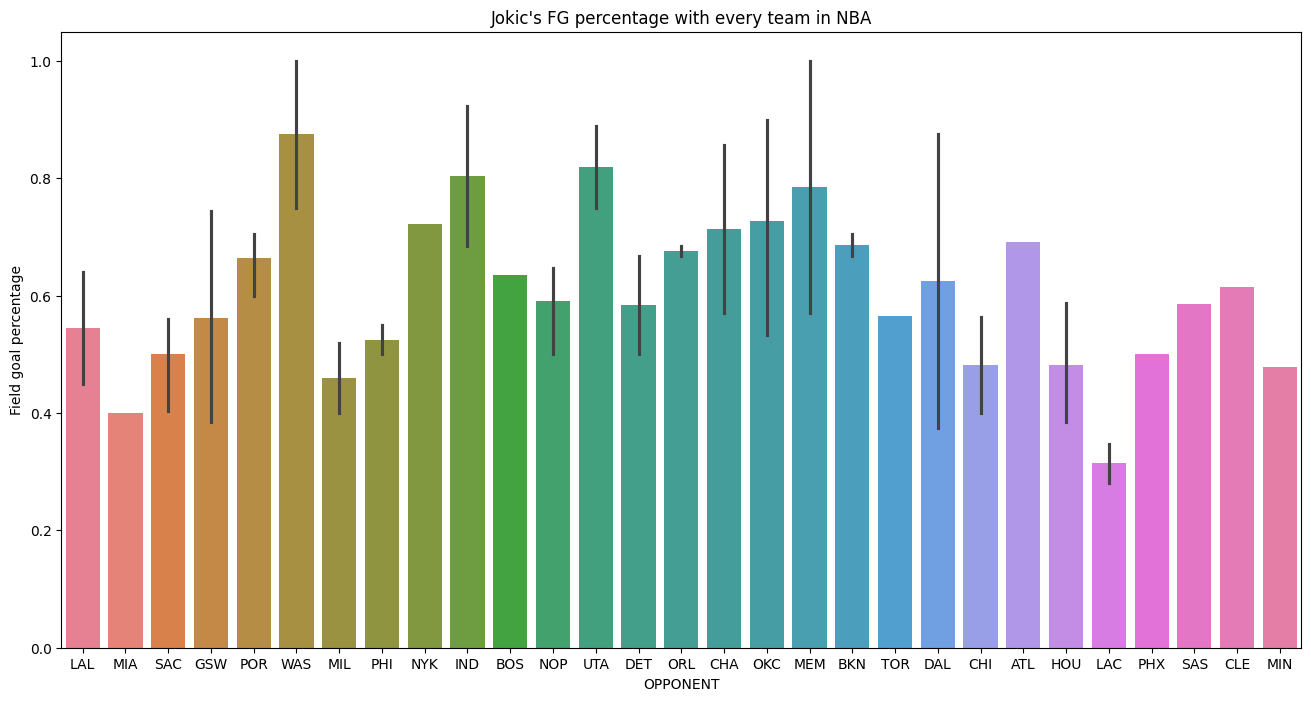

In [118]:
plt.figure(figsize=(16, 8))
plt.title("Jokic's FG percentage with every team in NBA")
sns.barplot(data=jokic_data, x="OPPONENT", y="FG_PCT", hue="OPPONENT")
plt.ylabel("Field goal percentage")

Text(0, 0.5, 'Field goal attempts')

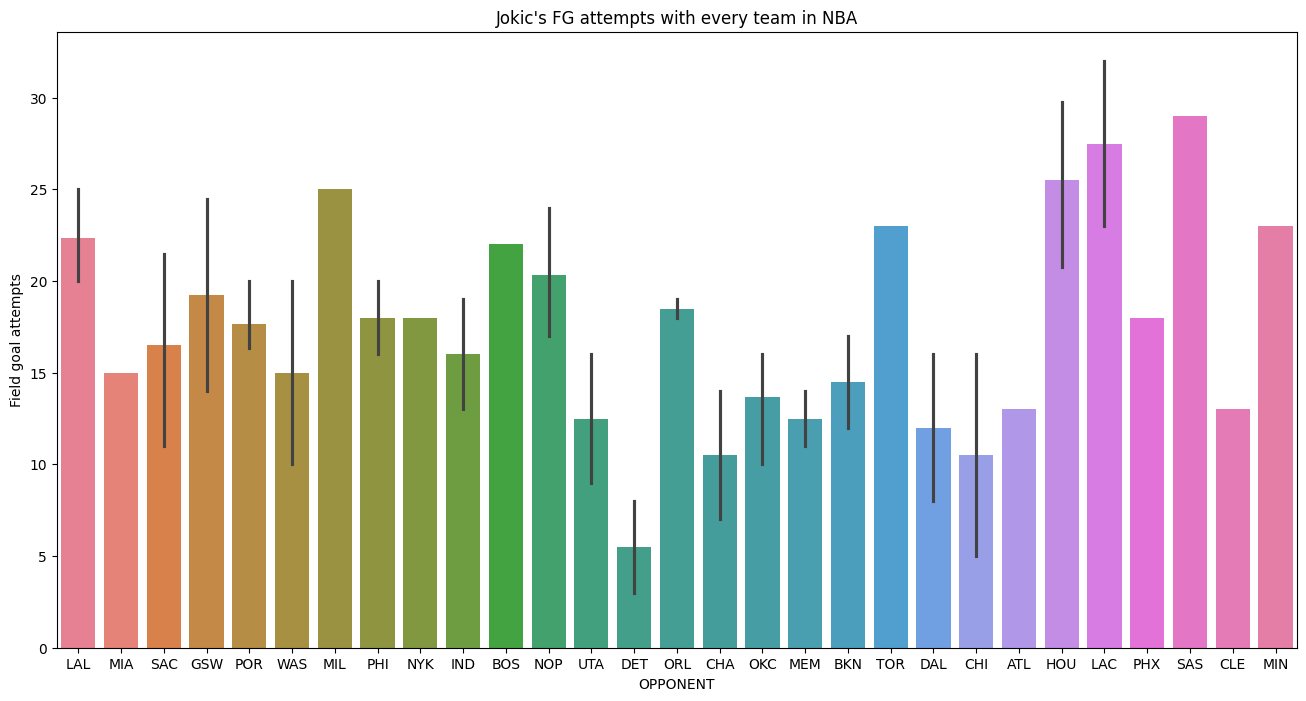

In [119]:
plt.figure(figsize=(16, 8))
plt.title("Jokic's FG attempts with every team in NBA")
sns.barplot(data=jokic_data, x="OPPONENT", y="FGA", hue="OPPONENT")
plt.ylabel("Field goal attempts")

Text(0, 0.5, 'Blocks')

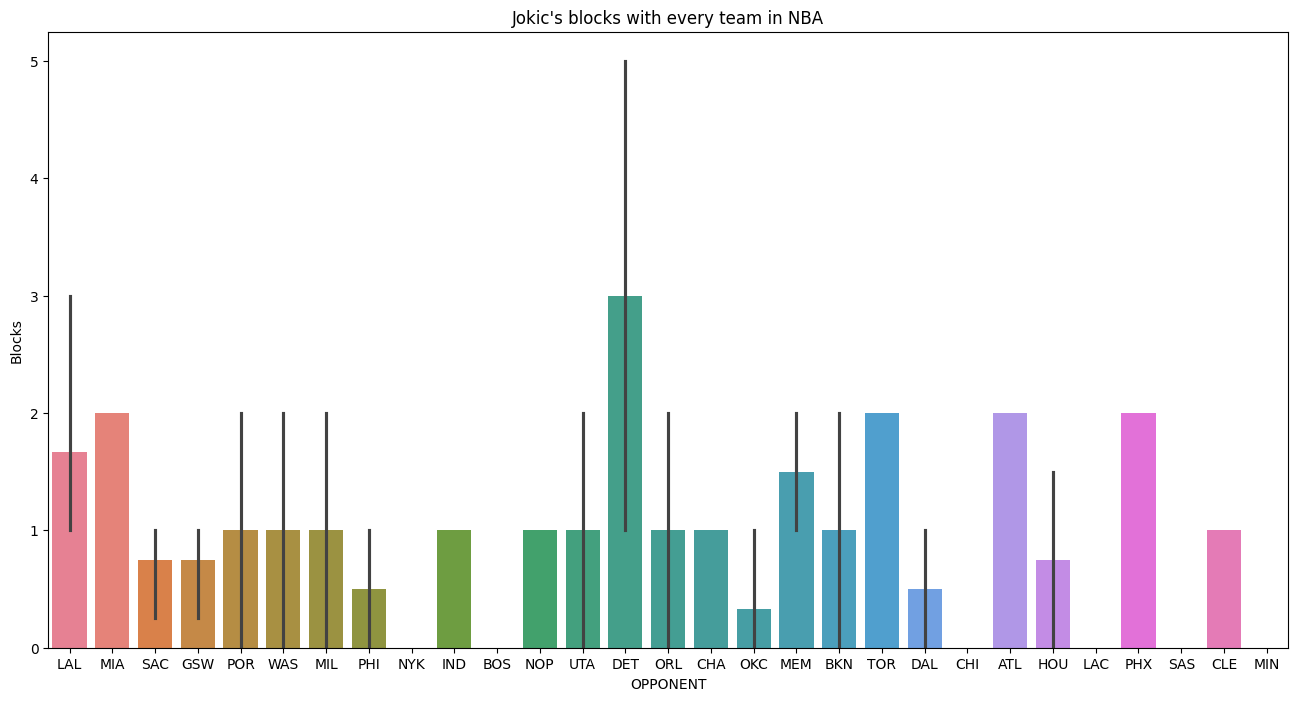

In [155]:
plt.figure(figsize=(16, 8))
plt.title("Jokic's blocks with every team in NBA")
sns.barplot(data=jokic_data, x="OPPONENT", y="BLK", hue="OPPONENT")
plt.ylabel("Blocks")

In [124]:
import numpy as np

Text(0, 0.5, 'Turnovers')

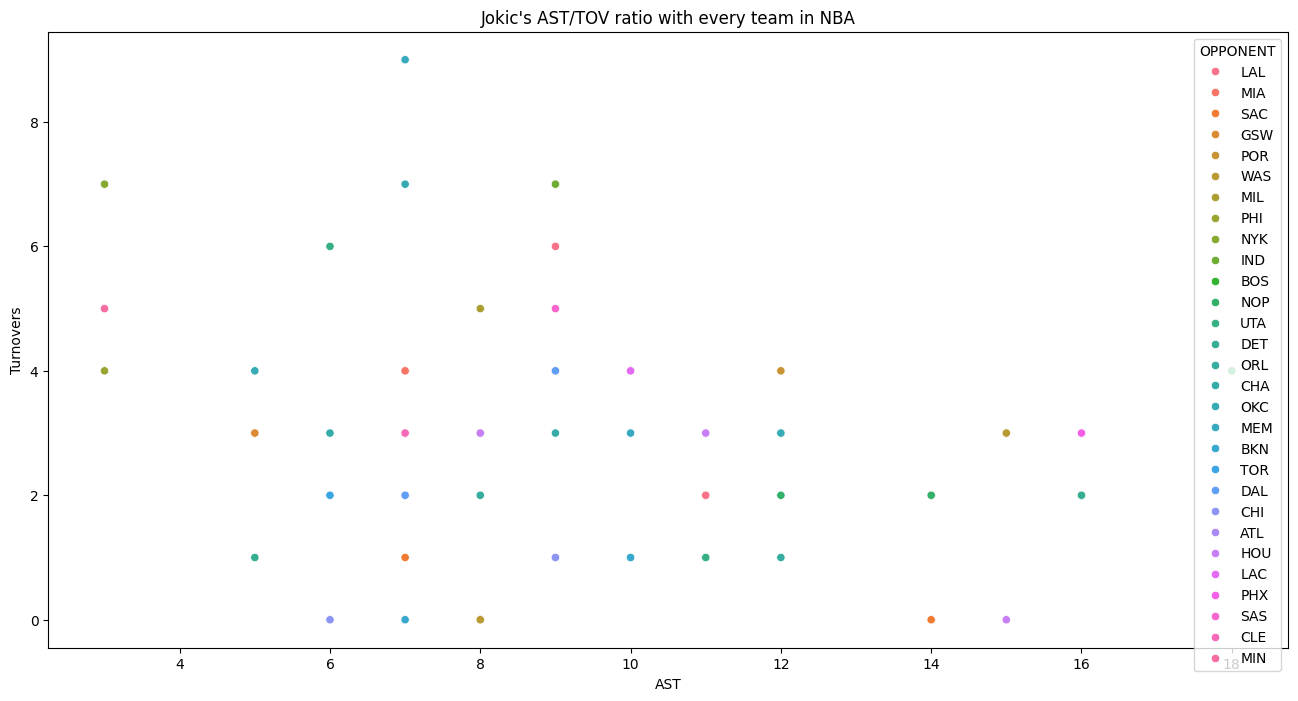

In [131]:
plt.figure(figsize=(16, 8))
plt.title("Jokic's AST/TOV ratio with every team in NBA")
sns.scatterplot(data=jokic_data, x="AST", y="TOV", hue="OPPONENT")
plt.ylabel("Turnovers")

Text(0, 0.5, 'Minutes')

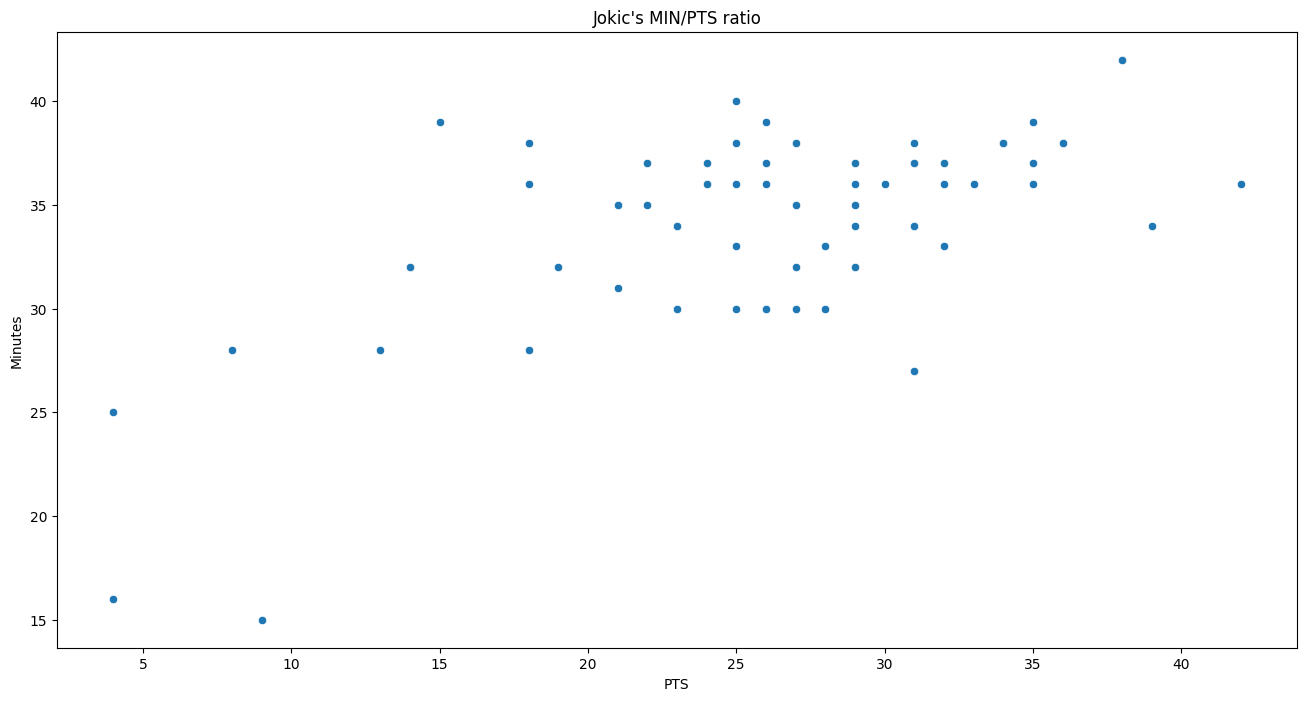

In [158]:
plt.figure(figsize=(16, 8))
plt.title("Jokic's MIN/PTS ratio")
sns.scatterplot(data=jokic_data, x="PTS", y="MIN")
plt.ylabel("Minutes")

Text(0, 0.5, 'Points')

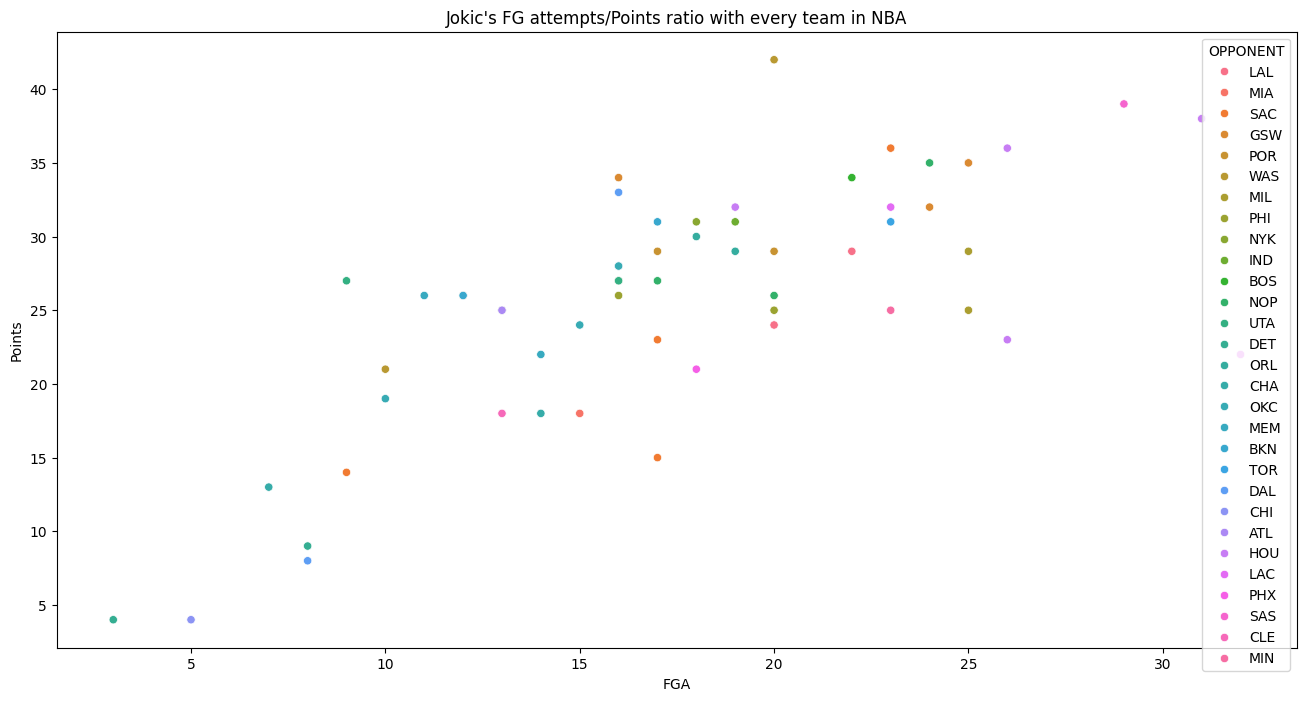

In [132]:
plt.figure(figsize=(16, 8))
plt.title("Jokic's FG attempts/Points ratio with every team in NBA")
sns.scatterplot(data=jokic_data, x="FGA", y="PTS", hue="OPPONENT")
plt.ylabel("Points")

Text(0, 0.5, 'Points')

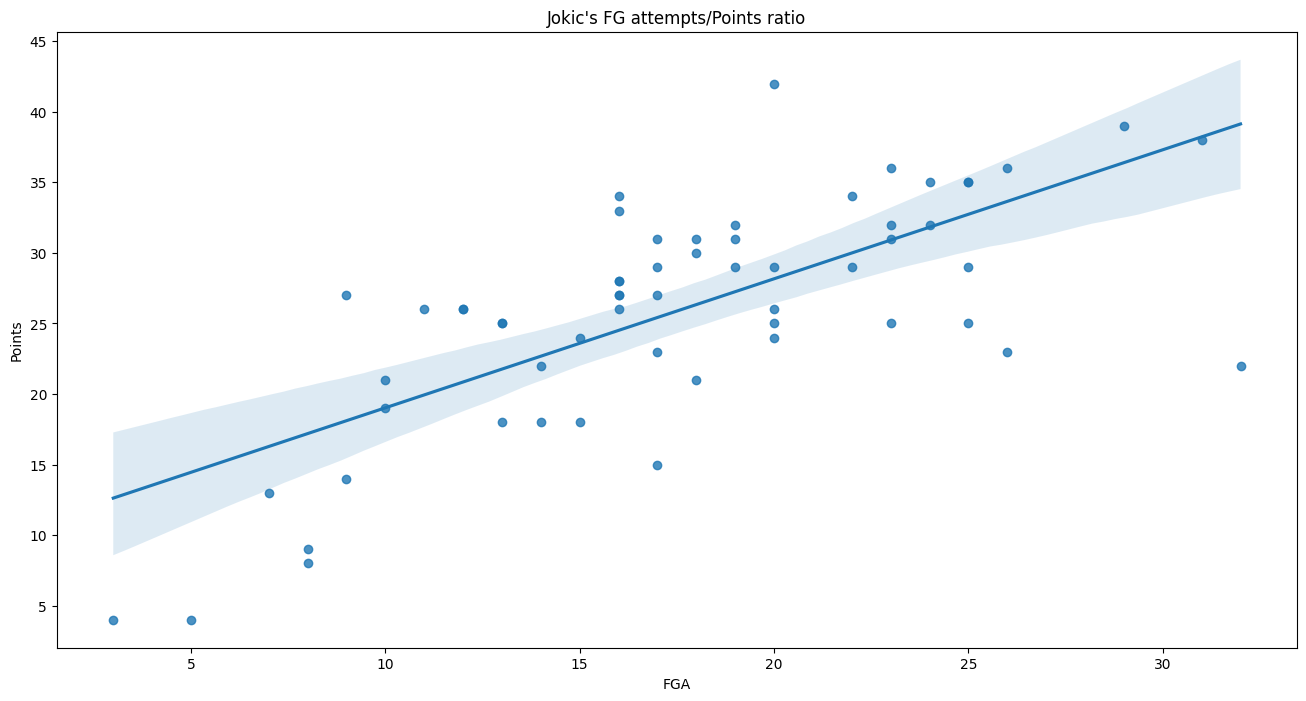

In [135]:
plt.figure(figsize=(16, 8))
plt.title("Jokic's FG attempts/Points ratio")
sns.regplot(data=jokic_data, x="FGA", y="PTS")
plt.ylabel("Points")

Text(0, 0.5, 'Free Throw Attempts')

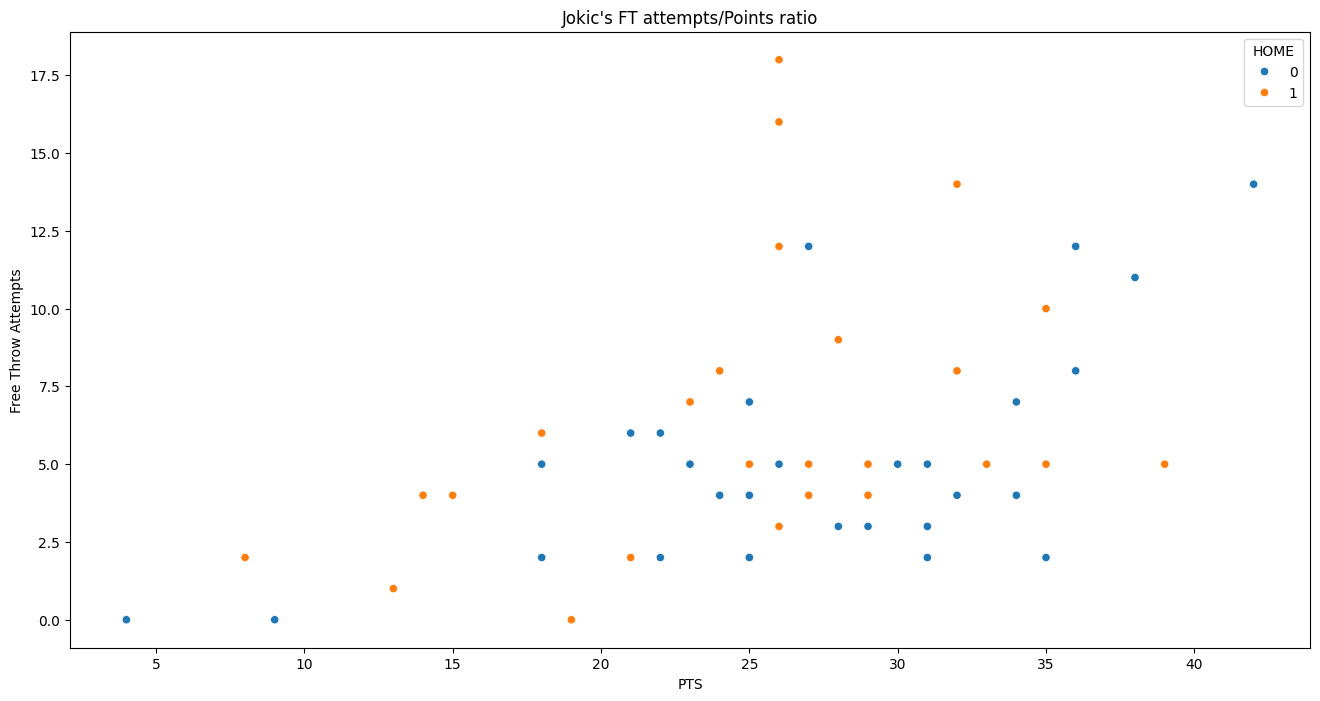

In [138]:
plt.figure(figsize=(16, 8))
plt.title("Jokic's FT attempts/Points ratio")
sns.scatterplot(data=jokic_data, x="PTS", y="FTA", hue="HOME")
plt.ylabel("Free Throw Attempts")

<Axes: xlabel='GAME_DATE', ylabel='PTS'>

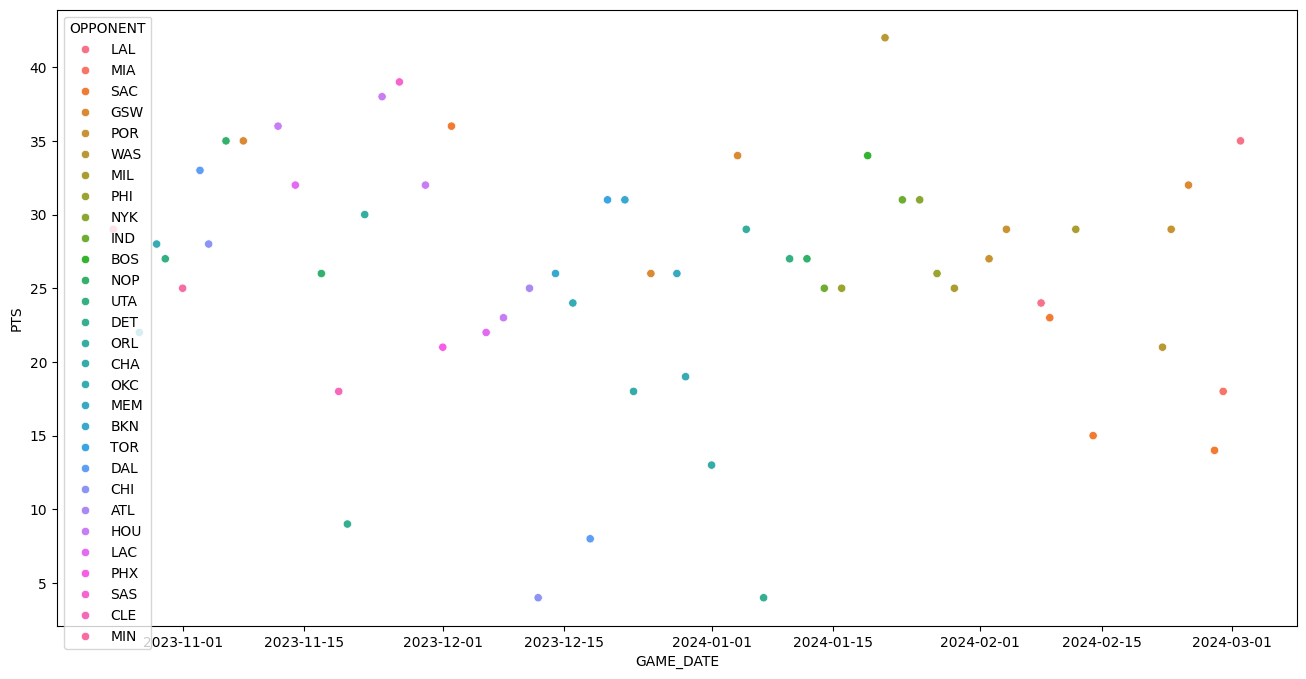

In [107]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=jokic_data, x="GAME_DATE", y="PTS", hue="OPPONENT")

Text(0, 0.5, 'Number of games')

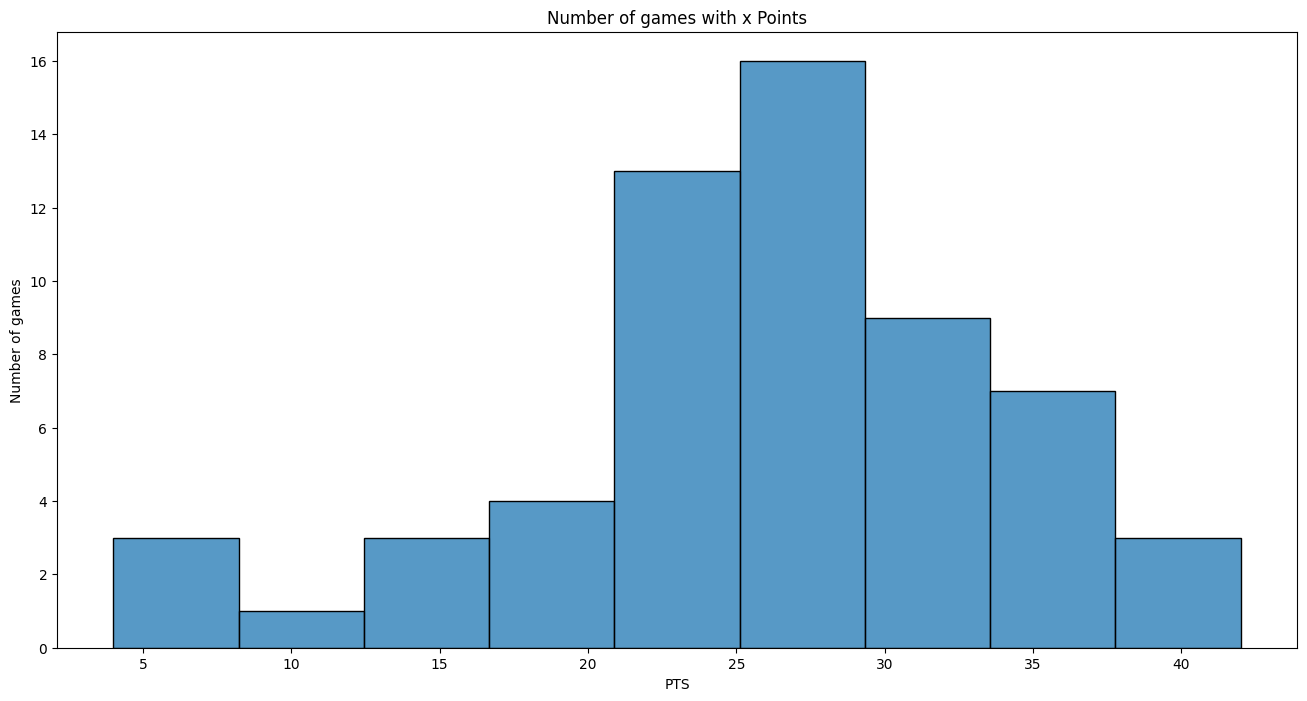

In [140]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x Points")
sns.histplot(data=jokic_data["PTS"])
plt.ylabel("Number of games")


Text(0, 0.5, 'Number of games')

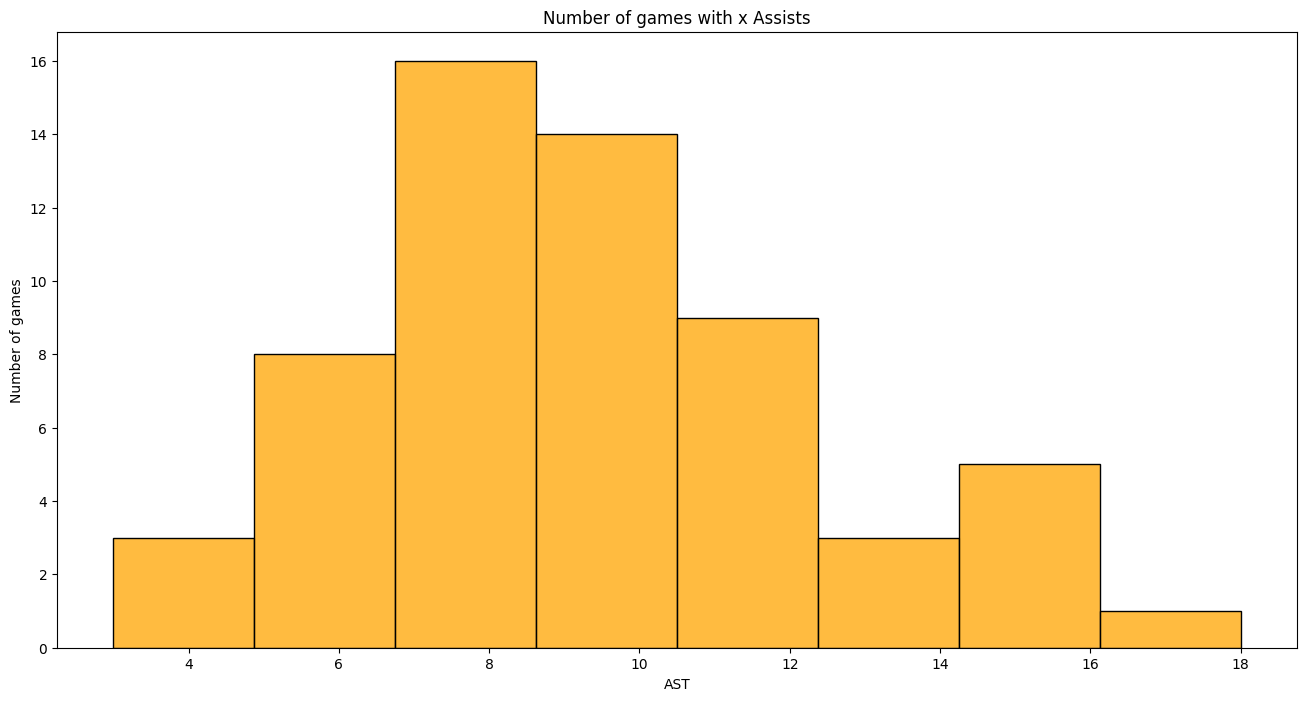

In [142]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x Assists")
sns.histplot(data=jokic_data["AST"], color='orange')
plt.ylabel("Number of games")

Text(0, 0.5, 'Number of games')

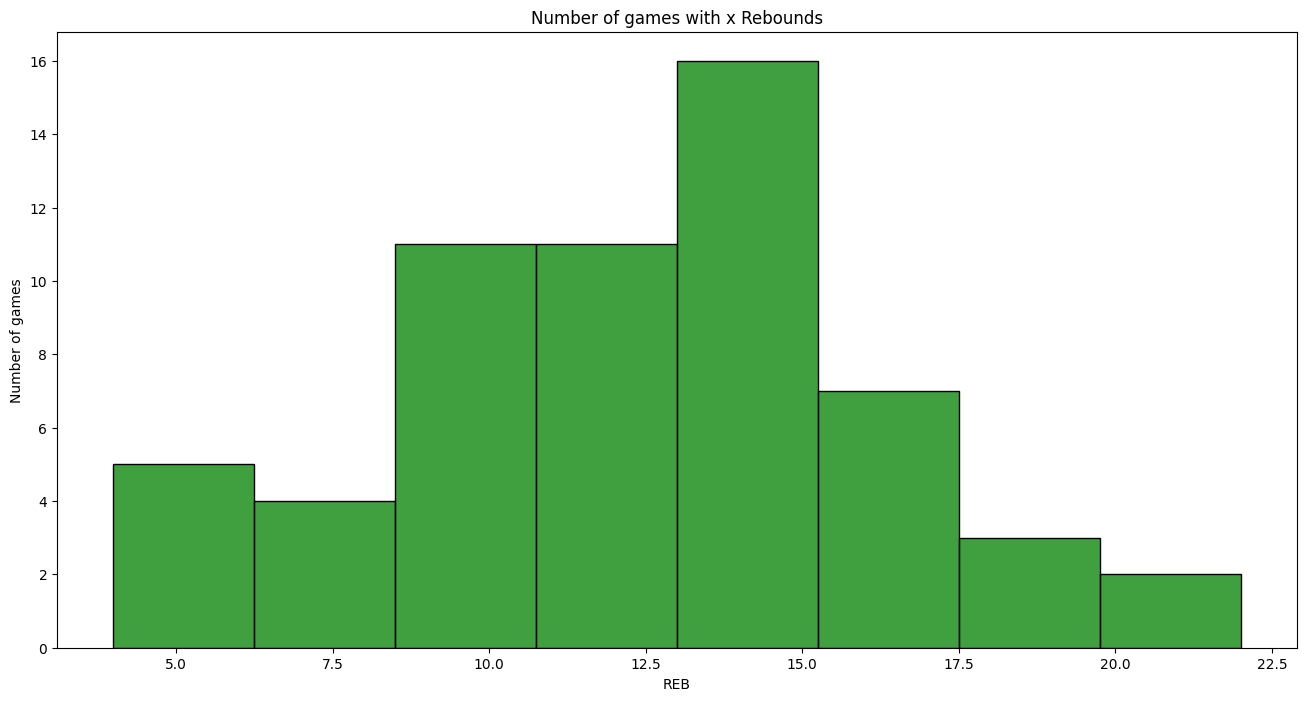

In [143]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x Rebounds")
sns.histplot(data=jokic_data["REB"], color='green')
plt.ylabel("Number of games")

Text(0, 0.5, 'Number of games')

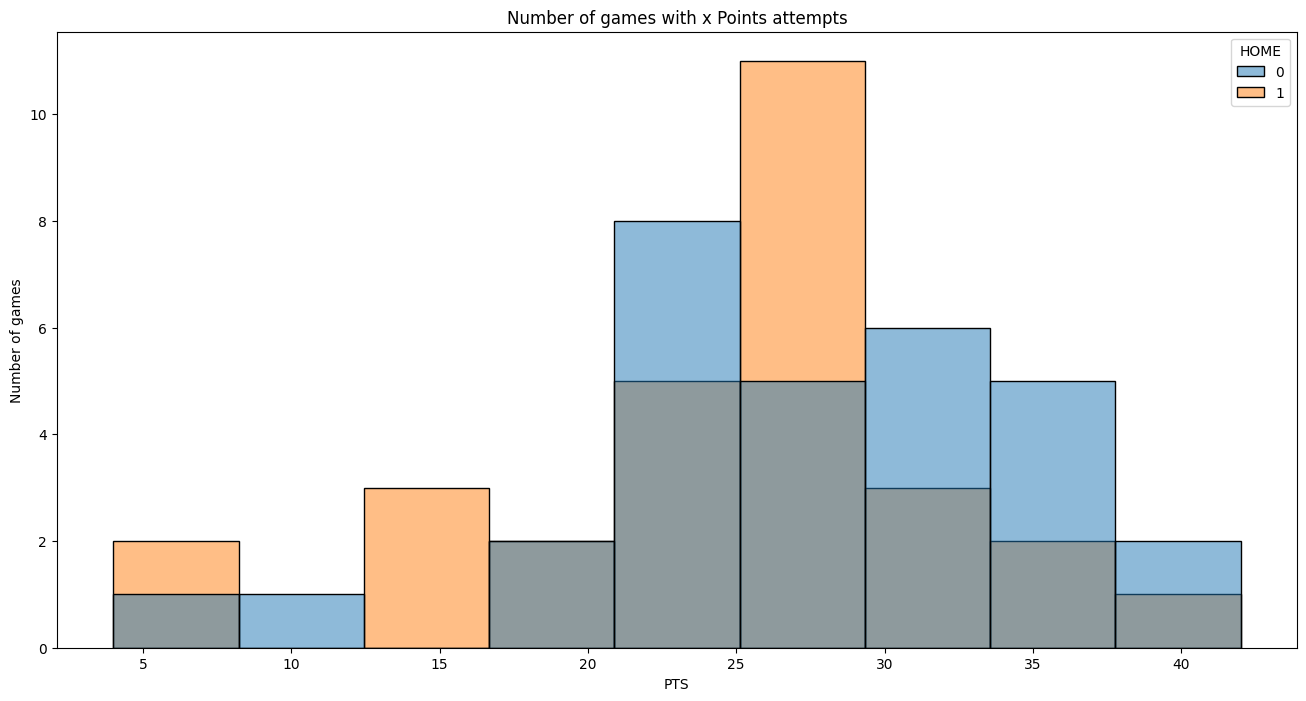

In [154]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x Points attempts")
sns.histplot(data=jokic_data, x="PTS", hue="HOME")
plt.ylabel("Number of games")

Text(0, 0.5, 'Number of games')

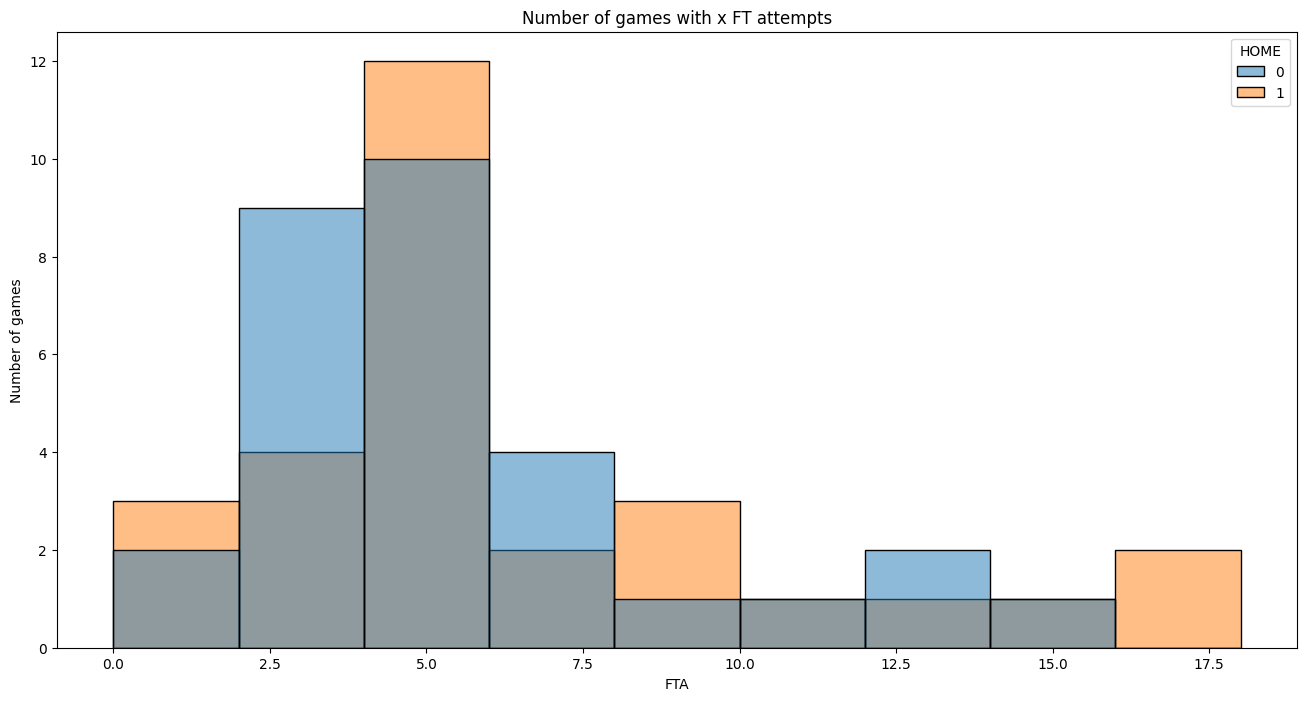

In [144]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x FT attempts")
sns.histplot(data=jokic_data, x="FTA", hue="HOME")
plt.ylabel("Number of games")

Text(0, 0.5, 'Number of games')

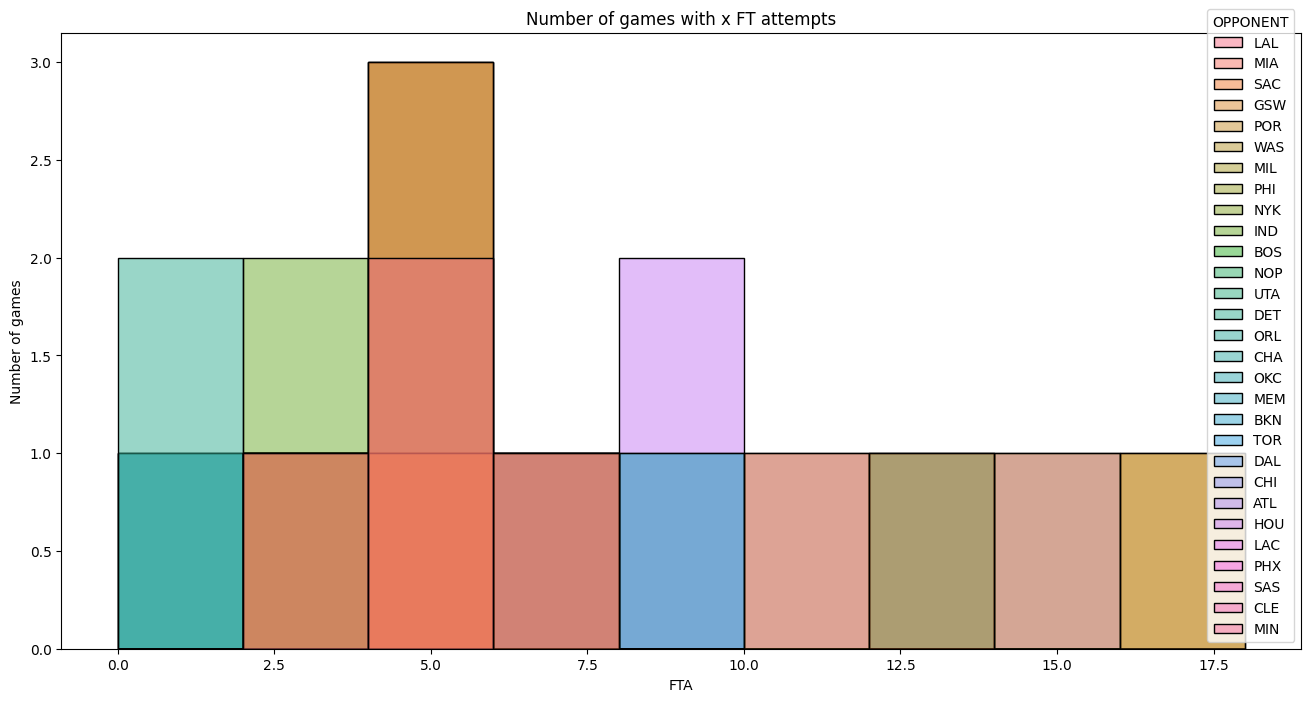

In [145]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x FT attempts")
sns.histplot(data=jokic_data, x="FTA", hue="OPPONENT")
plt.ylabel("Number of games")

Text(0.5, 1.0, 'Distribution of Offensive Rebounds, by home or away games')

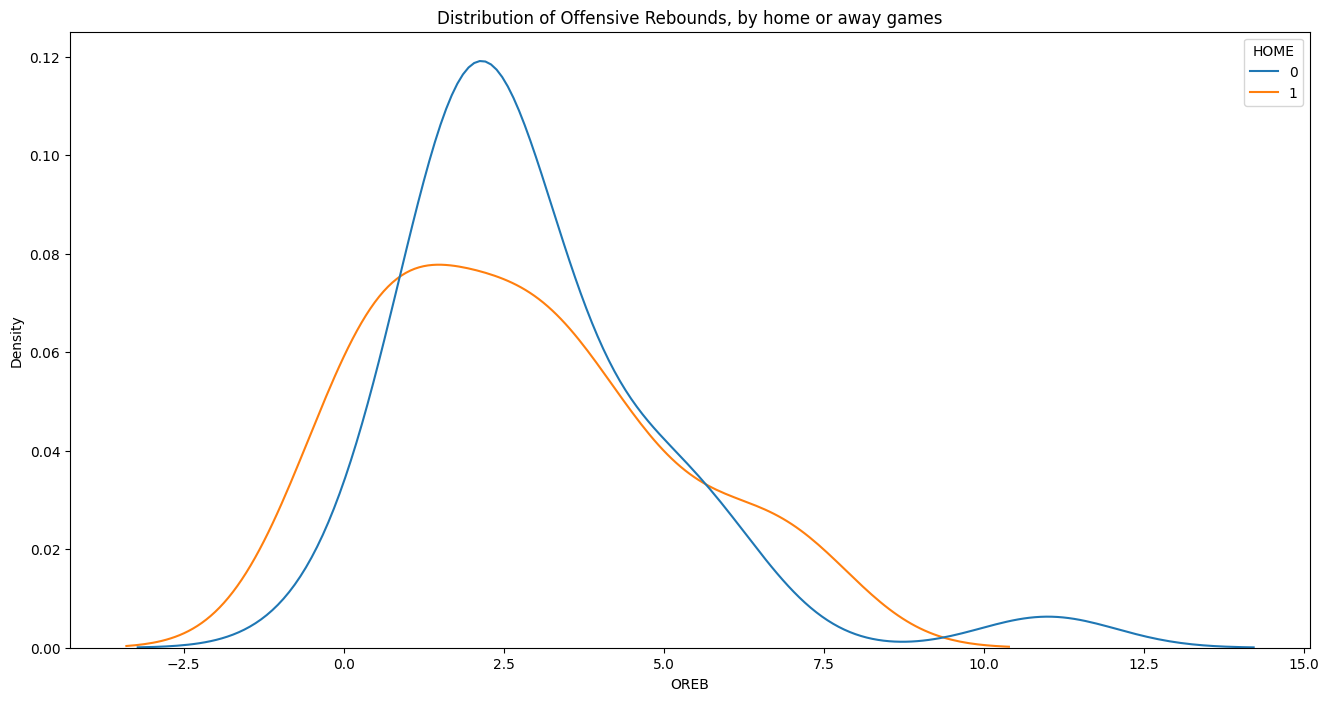

In [152]:
plt.figure(figsize=(16, 8))

sns.kdeplot(data=jokic_data, x="OREB", hue="HOME")

# Add title
plt.title("Distribution of Offensive Rebounds, by home or away games")

Text(0.5, 1.0, 'Distribution of Defensive Rebounds, by home or away games')

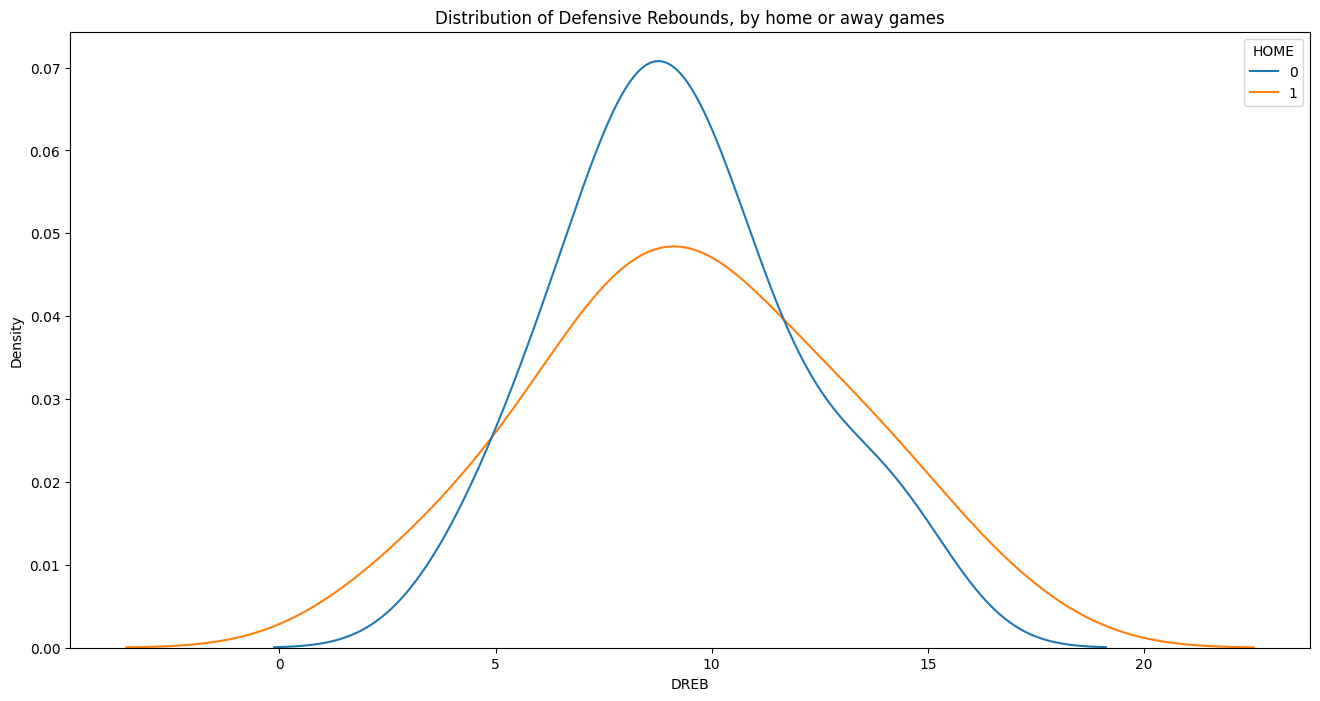

In [153]:
plt.figure(figsize=(16, 8))

sns.kdeplot(data=jokic_data, x="DREB", hue="HOME")

# Add title
plt.title("Distribution of Defensive Rebounds, by home or away games")